# Analyzing Selfplay Data

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.game_data import read_training_data
from aegomoku.utils import analyse_example, stones_from_example
from pathlib import Path

import os

# The Data

In [53]:
PHASE = '0'
HOST = os.uname()[1]
SELFPLAY_DATA=Path.home() / 'workspace/Project-Ellie/DATA/selfplay' / PHASE / HOST
print(SELFPLAY_DATA)
print(os.listdir(SELFPLAY_DATA))

/home/wgiersche/workspace/Project-Ellie/DATA/selfplay/0/scylla
['00005.pickle', '00011.pickle', '00003.pickle', '00009.pickle', '00000.pickle', '00007.pickle', '00010.pickle', '00012.pickle', '00006.pickle', 'gameplay_params.yaml', '00008.pickle', '00001.pickle', '00002.pickle', '00004.pickle']


In [54]:
a_pickle = SELFPLAY_DATA / '00010.pickle'
filename = a_pickle.as_posix()
filename

'/home/wgiersche/workspace/Project-Ellie/DATA/selfplay/0/scylla/00010.pickle'

In [55]:
examples, games = read_training_data(filename)
len(examples), len(examples[0]), examples[0][0].shape

(6984, 3, (21, 21, 3))

In [56]:
BOARD_SIZE = 19
board = GomokuBoard(BOARD_SIZE)
for game in games:
    print(f"{game[0]} begins with black")
    print([board.Stone(i) for i in game[1]])

P400 begins with black
[K9, J8, H10, I8, K8, K10, J9, L9, I10, L7, G12, H11, L8, M8, J11, K6, H9, G8, L13, K12, G9, I9, F8, I11, O10, O6, N7, N6, M6, L5, M4, I4, J5, M5, K7, I5, I6, K14, G10, K13, K11, G11, F10, E11, E10]
P200 begins with black
[L12, I11, I8, K8, L11, L14, K13, J14, K14, K15, M13, I13, H12, I12, I9, I14, I10, I15]
P400 begins with black
[H10, J10, K9, I10, L10, J8, J9, I9, K11, I11, J12, I13, I12, I8, I7, K8, N8, M9, H8, M8, L8, H12, F10, F14, G13, M7, G9, M10, E11]
P200 begins with black
[I11, K12, L12, J10, L11, L13, J11, K11, K10, M12, N11, M8, M11, P11, K13, J14, J12, L14, H10, G9, O9, N10, O10, O11, L8, L9, O6, O7, N12, L10, N8, Q11, N15, N14, O13, K14, M14, H14, I14, J15, I16, P14, I15, I13, G11, I9, J9, I8, H11, F11, H9, H8, G7, H12, I10, K15, L16, K8, G8, F7, I17, I18, F13, G12, F10, E10, H13, I12, E12, J16, G14, H15, C10, D11, J17, C8, D9, H17, H16, G16, F15, G15, F16, F17]
P400 begins with black
[J8, L10, K10, L8, L9, M8, K8, M10, K9, K7, M9, N9, K12, K11, I9

---

## Data Verification
We have records from those games in 8 symmetries. Now we skim through a good chunk of training records to check whether it makes sense (to some degree).

In [27]:
import random
n = random.randint(0, len(examples))
print(len(examples))

264


## Compare with the original policy's estimate

191
Next to play: BLACK
Value from BLACK's point of view: -0.035102084279060364
([217, 235, 199, 218, 183, 200, 182, 184, 181, 179, 180, 145, 163, 140], 'BLACK')
Next to play: BLACK
Value from BLACK's point of view: -0.08172758668661118


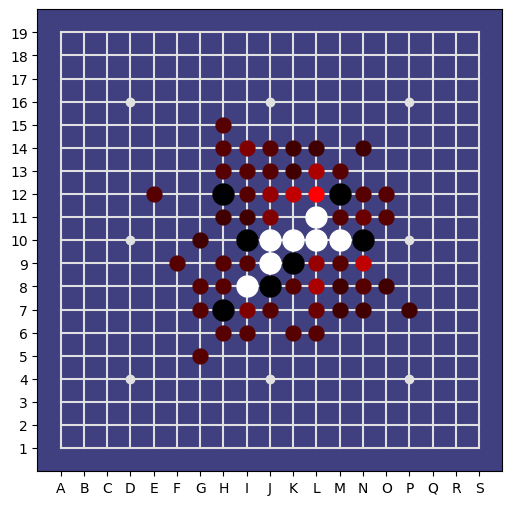

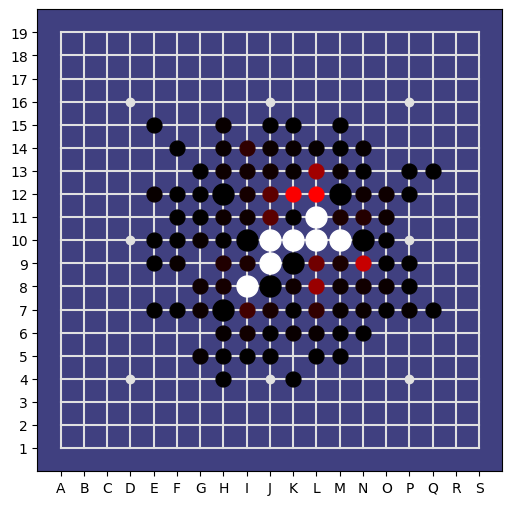

In [50]:
n = random.randint(0, len(examples))
#n = 4688
print(n)
example = examples[n]
s, p, v = example
analyse_example(example, policy_cutoff=1, disp_width=6)
print(stones_from_example(example))
# print(list(example[1]))
from aegomoku.policies.topological_value import TopologicalValuePolicy

policy = TopologicalValuePolicy(kappa_s=6, kappa_d=5)
p, v = policy.evaluate(s)
analyse_example((s, p, v), policy_cutoff=1, disp_width=6)

In [169]:
p.shape, type(p)

((361,), numpy.ndarray)

In [166]:
import numpy as np
print((p.reshape((19, 19))*99 / np.max(p)).astype(int))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  2  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0 16  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  2 24  0 99  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  6  3  5 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  5  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0

In [172]:
advisable = policy.get_advisable_actions(s, cut_off=.1, percent_secondary=0, min_secondary=0)
print([board.Stone(i) for i in advisable])
advisable

[O9, K8, J7, L7, N6]


[204, 219, 237, 239, 260]

In [171]:
analyse_example((s, advisable, v), policy_cutoff=0.01, disp_width=5)

ValueError: Not a valid move: (2, -118). Beyond board boundary.